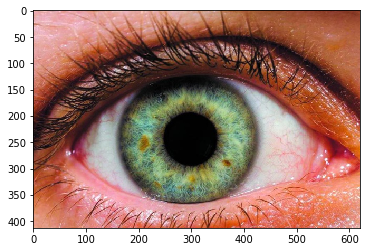

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2
img = cv2.imread('img/olho.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

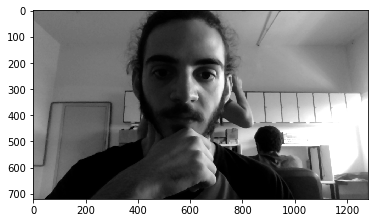

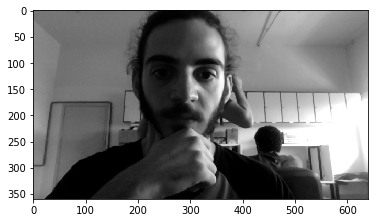

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2

img = cv2.imread('img/sid.jpeg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(img,5)
plt.imshow(img, cmap="gray")
plt.show()

img2 = cv2.resize(img, None, fx = 0.5, fy=0.5)
plt.imshow(img2, cmap="gray")
plt.show()



654


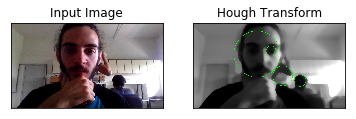

(720, 1280, 3)


TypeError: only size-1 arrays can be converted to Python scalars

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

bgr_img = cv2.imread('img/sid.jpeg') 

if bgr_img.shape[-1] == 3:           
    b,g,r = cv2.split(bgr_img)      
    rgb_img = cv2.merge([r,g,b])     
    gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
else:
    gray_img = bgr_img

img = cv2.medianBlur(gray_img, 35)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=55,param2=50,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
print(circles[0,:][0][0])
for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cimg)
plt.title('Hough Transform'), plt.xticks([]), plt.yticks([])
plt.show()
print(rgb_img.shape)
b = rgb_img[int(circles[0,:][0][0])-100:int(circles[0][:][0])+100, int(circles[0][:][0][1])-100:int(circles[0][:][0][1])+100,:]
plt.imshow(b)
plt.show()

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

bgr_img = cv2.imread('img/eye.jpg') 

if bgr_img.shape[-1] == 3:           
    b,g,r = cv2.split(bgr_img)   
    rgb_img = cv2.merge([r,g,b])     
    gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
else:
    gray_img = bgr_img

img = cv2.medianBlur(gray_img, 15)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
retval, thresholded = cv2.threshold(cimg, 30, 255, cv2.THRESH_BINARY)

circles1 = cv2.HoughCircles(thresholded,cv2.HOUGH_GRADIENT,1,20,
                            param1=55,param2=50,minRadius=0,maxRadius=0)

circles1 = np.uint16(np.around(circles1))

for i in circles1[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cimg)
plt.title('Hough Transform'), plt.xticks([]), plt.yticks([])
plt.show()

ImportError: No module named cv2

In [1]:
% matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, filters

img_color = io.imread("img/webcam3.jpg")
img_bw = io.imread("img/webcam3.jpg", as_grey=True)
img_sobel = filters.sobel(img_bw)
#bgr_img = cv2.imread('img/eye.jpg')
#rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)   
img2 = img_color.copy()

#img = cv2.medianBlur(gray_img, 35)
#cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img_sobel,cv2.HOUGH_GRADIENT,1,20,
                            param1=55,param2=50,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
#print(circles[0,:][0][0])
for i in circles[0,:]:
    cv2.circle(img2,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(img2,(i[0],i[1]),2,(0,0,255),3)
    
#Plotando a imagem original e a com os círculos da transformada
plt.subplot(121),plt.imshow(img_color)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2)
plt.title('Hough Transform'), plt.xticks([]), plt.yticks([])
plt.show()

ModuleNotFoundError: No module named 'cv2'

In [3]:
import numpy as np
import cv2

# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

error: /tmp/build/80754af9/opencv_1512687413662/work/modules/objdetect/src/cascadedetect.cpp:1698: error: (-215) !empty() in function detectMultiScale
